In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# LDA on Iris Dataset

In [2]:
# Load the Iris dataset
iris = sklearn.datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
X.shape

(150, 4)

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris_class_counts = pd.Series(y).value_counts()
iris_class_counts

,count
0,50
1,50
2,50


- Iris dataset has 150 observations with 4 features and 3 classes
- Classes: 0 (Setosa), 1 (Versicolor), 2 (Virginica)

In [6]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply Linear Discriminant Analysis

In [7]:
# Apply LDA - Set n_components=2 2D) for visualization
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Train a classifier using LDA features
lda_classifier = LinearDiscriminantAnalysis()
lda_classifier.fit(X_train_lda, y_train)

# Predict on test data
y_pred = lda_classifier.predict(X_test_lda)

In [8]:
# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=iris.target_names)

In [9]:
print(accuracy)

1.0


The LDA model correctly classified all test samples without any misclassification.

In [10]:
# Display classification report
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



- Precision & Recall of 1.00 means zero false positives and zero false negatives.
- Macro & Weighted Averages are also 1.00, confirming strong overall performance.

LDA performed exceptionally well on the Iris dataset, likely because the classes are well-separated in feature space.

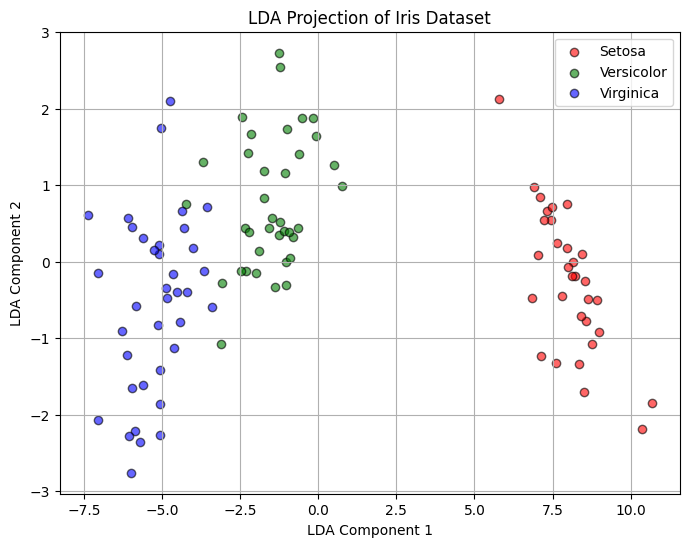

In [11]:
# Visualizing LDA projection
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b']
labels = ['Setosa', 'Versicolor', 'Virginica']

for i in range(3):
    plt.scatter(X_train_lda[y_train == i, 0], X_train_lda[y_train == i, 1],
                color=colors[i], label=labels[i], alpha=0.6, edgecolors='k')

plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA Projection of Iris Dataset')
plt.legend()
plt.grid()
plt.show()

# LDA on Wine Dataset

In [12]:
# Load the dataset
wine = sklearn.datasets.load_wine()
X_wine = wine.data
y_wine = wine.target

In [13]:
X_wine.shape

(178, 13)

In [14]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [15]:
wine_class_counts = pd.Series(y_wine).value_counts()
wine_class_counts

,count
1,71
0,59
2,48


- Wine dataset has 178 observations, 13 features and 3 classes

In [16]:
# Split into training and testing sets
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, y_wine, test_size=0.3, random_state=42)

# Standardize the data
X_train_wine = scaler.fit_transform(X_train_wine)
X_test_wine = scaler.transform(X_test_wine)

In [17]:
# Apply LDA
lda_wine = LinearDiscriminantAnalysis(n_components=2)  # Reduce to 2D for visualization
X_train_wine_lda = lda_wine.fit_transform(X_train_wine, y_train_wine)
X_test_wine_lda = lda_wine.transform(X_test_wine)

In [18]:
# Train a classifier using LDA features
lda_classifier_wine = LinearDiscriminantAnalysis()
lda_classifier_wine.fit(X_train_wine_lda, y_train_wine)

# Predict on test data
y_pred_wine = lda_classifier_wine.predict(X_test_wine_lda)

In [19]:
# Evaluate performance
accuracy_wine = accuracy_score(y_test_wine, y_pred_wine)
report_wine = classification_report(y_test_wine, y_pred_wine, target_names=wine.target_names)

In [20]:
print(accuracy)

1.0


In [21]:
# Display results
print(report_wine)

              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        19
     class_1       1.00      1.00      1.00        21
     class_2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



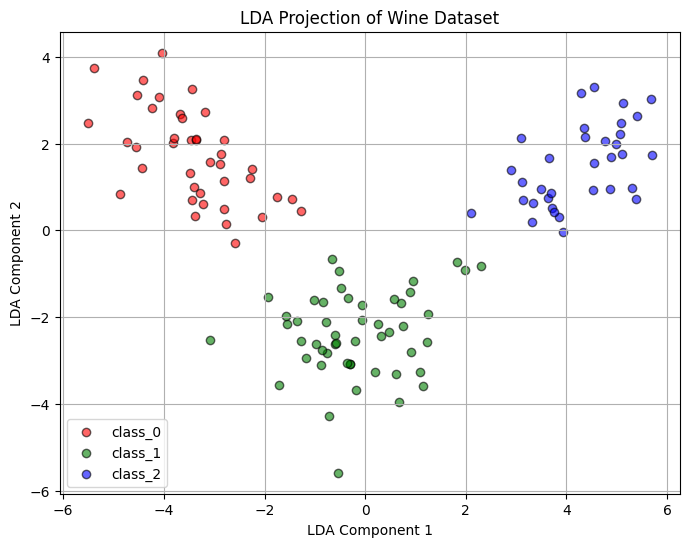

In [22]:
# Visualizing LDA projection
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b']
labels = wine.target_names

for i in range(3):
    plt.scatter(X_train_wine_lda[y_train_wine == i, 0], X_train_wine_lda[y_train_wine == i, 1],
                color=colors[i], label=labels[i], alpha=0.6, edgecolors='k')

plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA Projection of Wine Dataset')
plt.legend()
plt.grid()
plt.show()

- The scatter plot above shows the Wine dataset projected onto two LDA components.
- The classes are well-separated, indicating that LDA successfully reduced dimensionality while keeping distinct clusters


## Key Takeaways
- LDA still performs perfectly on Sklearn's Wine dataset.
- The classes were **clearly separable** in the transformed space.  
- Dimensionality reduction (from 13D to 2D) preserved class information.